### **K-means** Algorithm for **`Clustering`**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [40]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)
X

array([[-7.86597209, -3.74887751],
       [-8.69639199, -5.37529499],
       [-8.52053922, -5.61133075],
       ...,
       [-8.37659298, -2.39797402],
       [-3.04881675, -3.02480902],
       [ 0.46119796,  8.2019134 ]], shape=(1000, 2))

- We are not going to take the y as we are going to perform the k-means

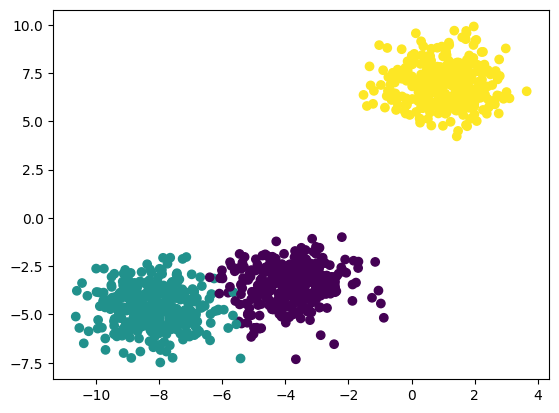

In [41]:
plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

In [42]:
## standardization --feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.cluster import KMeans

In [46]:
## Elbow method to select K value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [47]:
wcss

[1340.0000000000005,
 220.17146350011225,
 70.15437016616858,
 60.21921950864667,
 49.16995112573744,
 42.34640731004147,
 39.11961261253437,
 33.446759143551475,
 29.586082108512528,
 29.3788385283911]

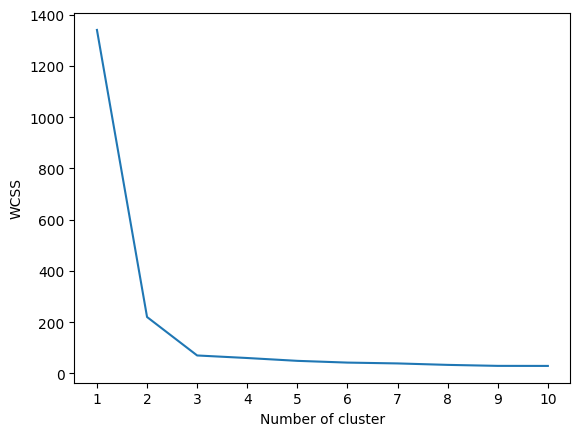

In [48]:
## plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3, init='k-means++' )

In [50]:
kmeans.fit(X_train_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [51]:
y_pred = kmeans.predict(X_test_scaled)

In [52]:
y_pred

array([1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2,
       2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0,
       2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1,
       2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1,
       2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2,

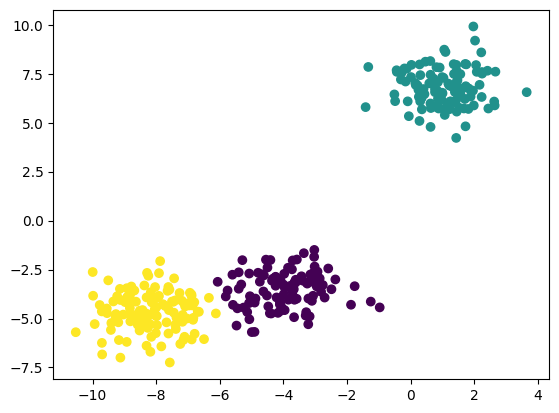

In [53]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

In [54]:
## validating the k value
## kneeLocator
## Silhoutee scoring

In [55]:
## kneeLocator
!pip install kneed


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from kneed import KneeLocator

In [57]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [58]:
kl.elbow

np.int64(3)

In [59]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [62]:
silhouette_coeffiecient=[]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coeffiecient.append(score)

In [63]:
silhouette_coeffiecient

[0.7519879000990606,
 0.7057679694690201,
 0.5787138013802615,
 0.42605953750938835,
 0.4316320996239064,
 0.329541844719948,
 0.3284403702979646,
 0.3297630602229416,
 0.3518750084493317]

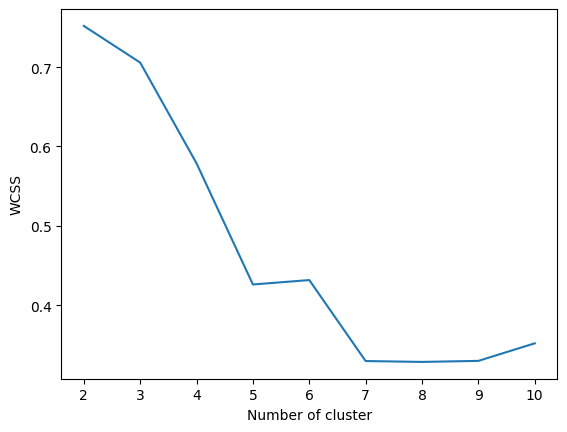

In [65]:
plt.plot(range(2, 11), silhouette_coeffiecient)
plt.xticks(range(2, 11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()